## Лабораторная работа №1 | Вариант 5

Выполнил:

### 1. Numpy

In [2]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [3]:
m = np.eye(3)

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [4]:
rgba_data_type = np.dtype([('r', np.uint8), ('g', np.uint8), ('b', np.uint8), ('a', np.uint8),])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [5]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [6]:
v = np.random.rand(10)
sorted_v = np.sort(v)
print(sorted_v)

[0.28607474 0.30581866 0.41953607 0.43509613 0.67488779 0.68296414
 0.68458035 0.72559804 0.77698722 0.88085546]


5. Создайте read-only массив(неизменяемый)

In [7]:
arr = np.array([1, 1, 1,])
arr.flags.writeable = False
# arr[1] = 23456

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [8]:
mtrx = np.random.randn(10, 2)
x, y = mtrx[:, 0], mtrx[ :, 1]
rad = np.sqrt(x ** 2 + y ** 2)
ang = np.arctan2(y, x)
polar = np.column_stack((rad, ang))
print(polar)

[[ 0.36937352  1.98483899]
 [ 0.77227304  0.92608976]
 [ 1.85449771  1.8862048 ]
 [ 2.6622107   2.63692048]
 [ 1.96477798 -1.30103639]
 [ 1.08938557  1.45593028]
 [ 1.99888936 -0.54276987]
 [ 1.02166309  2.87294471]
 [ 0.37857515  0.57859515]
 [ 1.05058698 -2.85272852]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [9]:
n = 10
x, y = np.linspace(0, 1, n), np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)
dtype = [('x', np.float64), ('y', np.float64)]
coords = np.zeros(X.shape, dtype=dtype)
coords['x'] = X
coords['y'] = Y

print(coords)

[[(0.        , 0.        ) (0.11111111, 0.        )
  (0.22222222, 0.        ) (0.33333333, 0.        )
  (0.44444444, 0.        ) (0.55555556, 0.        )
  (0.66666667, 0.        ) (0.77777778, 0.        )
  (0.88888889, 0.        ) (1.        , 0.        )]
 [(0.        , 0.11111111) (0.11111111, 0.11111111)
  (0.22222222, 0.11111111) (0.33333333, 0.11111111)
  (0.44444444, 0.11111111) (0.55555556, 0.11111111)
  (0.66666667, 0.11111111) (0.77777778, 0.11111111)
  (0.88888889, 0.11111111) (1.        , 0.11111111)]
 [(0.        , 0.22222222) (0.11111111, 0.22222222)
  (0.22222222, 0.22222222) (0.33333333, 0.22222222)
  (0.44444444, 0.22222222) (0.55555556, 0.22222222)
  (0.66666667, 0.22222222) (0.77777778, 0.22222222)
  (0.88888889, 0.22222222) (1.        , 0.22222222)]
 [(0.        , 0.33333333) (0.11111111, 0.33333333)
  (0.22222222, 0.33333333) (0.33333333, 0.33333333)
  (0.44444444, 0.33333333) (0.55555556, 0.33333333)
  (0.66666667, 0.33333333) (0.77777778, 0.33333333)
  (0.8888

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [22]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

c = np.array([[1 / (i - j) for j in y] for i in x])
print(c)

[[ -2.23752816  22.52744901   1.98872671   2.2339979   -5.02869014]
 [ -1.75596364 -12.79167667   2.62972309   3.07633745  -3.11114504]
 [ -0.33387347  -0.3993874   -0.48890417  -0.47605516  -0.36402238]
 [ -0.54185552  -0.73844426  -1.1163775   -1.05156821  -0.62599863]
 [ -0.26337443  -0.30252025  -0.35123215  -0.34455122  -0.28178436]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [25]:
arr = np.array([-19.99999, 0.34, 1.3], dtype=np.float32)
print(arr, arr.dtype)
arr = arr.view(np.int32)
print(arr, arr.dtype)

[-19.99999   0.34      1.3    ] float32
[-1046478853  1051595899  1067869798] int32


10. Как случайно заменить p элементов в 2D массиве?

In [29]:
arr = np.arange(20).reshape(4, 5)
p = 7

np.put(arr, np.random.choice(range(arr.size), p, replace=False), -1)

print(arr)

[[-1  1  2  3  4]
 [ 5 -1 -1 -1 -1]
 [10 11 12 -1 -1]
 [15 16 17 18 19]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [10]:
import pandas as pd

In [14]:
# Load dataset here
df = pd.read_csv("data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Узнайте сколько было на борту человек

In [22]:
total = len(df)
print(total)

891


2. Какой медианный и средний возраста пассажиров

In [23]:
mean = df['Age'].mean()
median = df['Age'].median()

print(mean, median)

29.69911764705882 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [26]:
surv_child = df.groupby(df['Age'] < 16)['Survived'].mean() * 100
surv_adult = df.groupby(df['Age'] >= 16)['Survived'].mean() * 100

print(surv_child[True], surv_adult[True])

59.036144578313255 38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [29]:
df_clean = df[df["Age"].notna()].copy()

women_children = df_clean[(df_clean["Sex"] == "female") | (df_clean["Age"] < 16)]
men_adults = df_clean[(df_clean["Sex"] == "male") & (df_clean["Age"] >= 16)]

surv_women_children = women_children["Survived"].mean() * 100
surv_men_adults = men_adults["Survived"].mean() * 100

print(f"Женщины и дети: {surv_women_children:.1f}%")
print(f"Мужчины: {surv_men_adults:.1f}%")
print(f"Разница: {surv_women_children - surv_men_adults:.1f}%")

if surv_women_children > surv_men_adults:
  print('Гипотеза верна')
else:
  print('Гипотеза не верна')

Женщины и дети: 72.4%
Мужчины: 17.4%
Разница: 55.0%
Гипотеза верна


5. Зависит ли выживаемость от класса обслуживания?

In [30]:
class_survive = df.groupby("Pclass")["Survived"].mean() * 100
print(f"1 класс {class_survive[1]}%")
print(f"2 класс {class_survive[2]}%")
print(f"3 класс {class_survive[3]}%")

if (class_survive[1] or class_survive[2]) > class_survive[3]:
    print("Зависит")

1 класс 62.96296296296296%
2 класс 47.28260869565217%
3 класс 24.236252545824847%
Зависит


6. Посчитайте средний возраст умерших женщин и мужчин

In [31]:
dead_men = df[(df["Survived"] == 0) & (df["Sex"] == "male")]["Age"].mean()
dead_women = df[(df["Survived"] == 0) & (df["Sex"] == "female")]["Age"].mean()

print(f"Средний возраст умерших мужчин: {dead_men:.1f}")
print(f"Средний возраст умерших женщин: {dead_women:.1f}")

Средний возраст умерших мужчин: 31.6
Средний возраст умерших женщин: 25.0


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [32]:
df['has_relatives'] = (df['SibSp'] + df['Parch']) > 0

survival_rate = df.groupby('has_relatives')['Survived'].mean() * 100

print("Процент выживаемости:")
print(f"С родственниками: {survival_rate[True]:.1f}%")
print(f"Без родственников: {survival_rate[False]:.1f}%")
print(f"Разница: {survival_rate[True] - survival_rate[False]:.1f}%")

Процент выживаемости:
С родственниками: 50.6%
Без родственников: 30.4%
Разница: 20.2%


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [33]:
avg_fare = df.groupby('Survived')['Fare'].mean()

print(f"Средняя стоимость билета:")
print(f"Выжившие: ${avg_fare[1]:.2f}")
print(f"Умершие: ${avg_fare[0]:.2f}")
print(f"Разница: ${avg_fare[1] - avg_fare[0]:.2f}")

Средняя стоимость билета:
Выжившие: $48.40
Умершие: $22.12
Разница: $26.28


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [34]:
survived_2_class = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]

min_age = survived_2_class['Age'].min()
max_age = survived_2_class['Age'].max()

print(f"Минимальный возраст: {min_age:.1f} лет")
print(f"Максимальный возраст: {max_age:.1f} лет")

Минимальный возраст: 0.7 лет
Максимальный возраст: 62.0 лет


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [36]:
men = df[df['Sex'] == 'male']

young = men[(men['Age'] >= 18) & (men['Age'] <= 30)]
adult = men[men['Age'] > 30]

young_survival = young['Survived'].mean() * 100
adult_survival = adult['Survived'].mean() * 100

print(f"Молодые (18-30): {young_survival:.1f}%")
print(f"Взрослые (30+): {adult_survival:.1f}%")

if young_survival > adult_survival:
    print("Гипотеза подтверждена")
else:
    print("Гипотеза опровергнута")

Молодые (18-30): 15.0%
Взрослые (30+): 20.3%
Гипотеза опровергнута


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

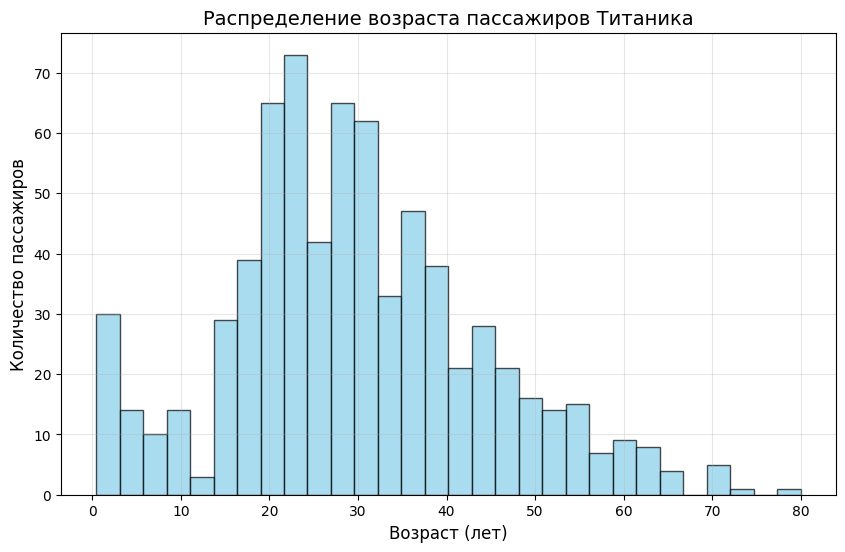

In [39]:
import matplotlib.pyplot as plt

df_age = df.dropna(subset=['Age'])

plt.figure(figsize=(10, 6))
plt.hist(df_age['Age'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.title('Распределение возраста пассажиров Титаника', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

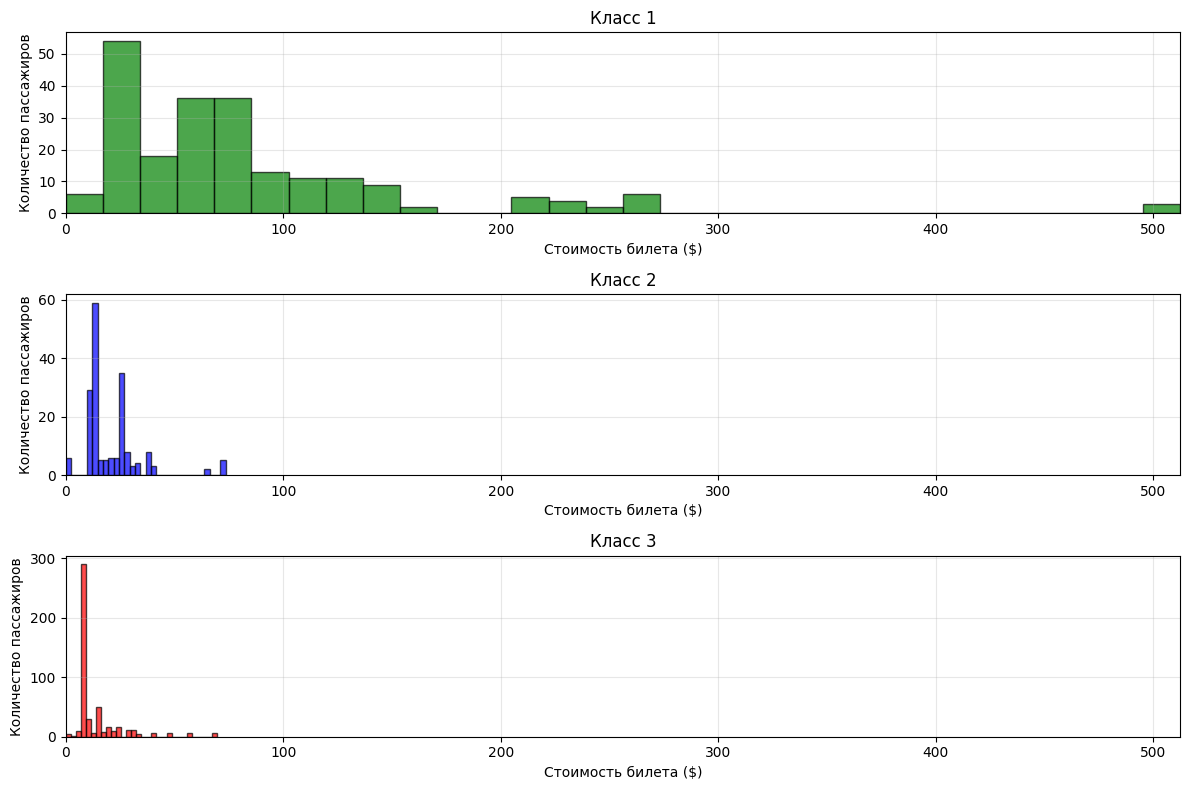

In [40]:
plt.figure(figsize=(12, 8))

for i, pclass in enumerate(sorted(df['Pclass'].unique()), 1):
    plt.subplot(3, 1, i)
    class_data = df[df['Pclass'] == pclass]
    plt.hist(class_data['Fare'].dropna(), bins=30, edgecolor='black', 
             alpha=0.7, color=['green', 'blue', 'red'][i-1])
    plt.xlabel('Стоимость билета ($)')
    plt.ylabel('Количество пассажиров')
    plt.title(f'Класс {pclass}')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, df['Fare'].max())

plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

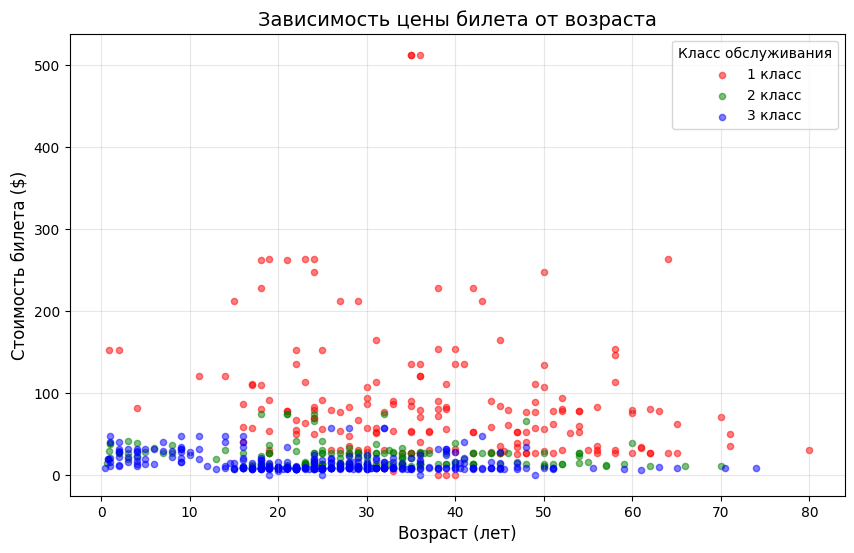

In [46]:
clean_df = df.dropna(subset=['Age', 'Fare'])

plt.figure(figsize=(10, 6))

colors = ['red', 'green', 'blue']
for pclass, color in zip([1, 2, 3], colors):
    mask = clean_df['Pclass'] == pclass
    plt.scatter(clean_df[mask]['Age'], clean_df[mask]['Fare'],
                alpha=0.5,
                c=color,
                s=20,
                label=f'{pclass} класс')

plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Стоимость билета ($)', fontsize=12)
plt.title('Зависимость цены билета от возраста', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Класс обслуживания')

plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

<Figure size 800x600 with 0 Axes>

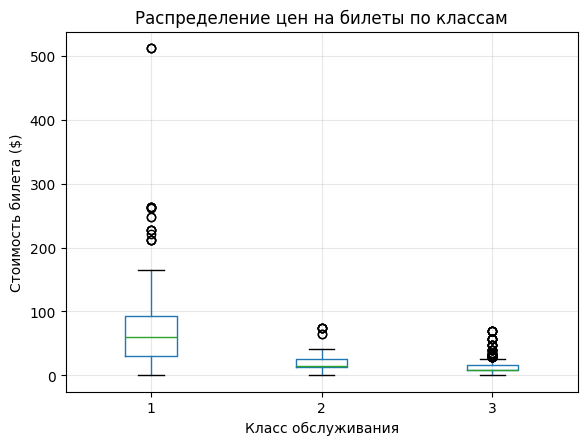

In [47]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Fare', by='Pclass', grid=False)
plt.title('Распределение цен на билеты по классам')
plt.suptitle('') 
plt.xlabel('Класс обслуживания')
plt.ylabel('Стоимость билета ($)')
plt.grid(True, alpha=0.3)
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

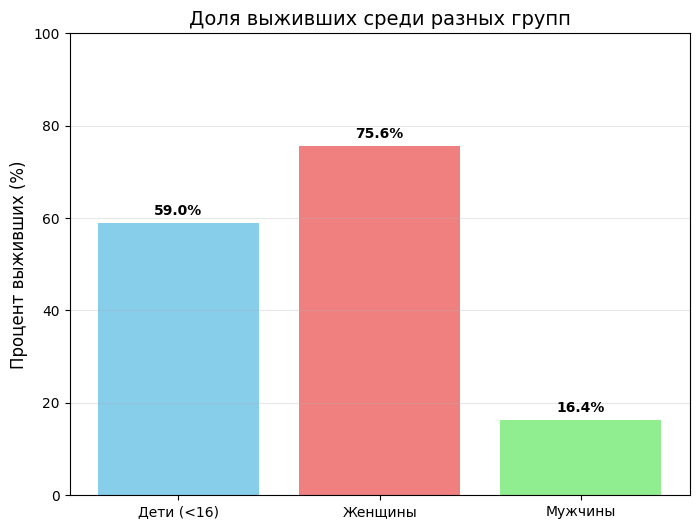

In [49]:
df['group'] = pd.cut(df['Age'], 
                     bins=[-1, 16, 100], 
                     labels=['Дети (<16)', 'Взрослые'])
df['group'] = df.apply(lambda row: 'Дети (<16)' if row['Age'] < 16 
                       else ('Мужчины' if row['Sex'] == 'male' else 'Женщины'), axis=1)

survival_rate = df.groupby('group')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
bars = plt.bar(survival_rate.index, survival_rate.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel('Процент выживших (%)', fontsize=12)
plt.title('Доля выживших среди разных групп', fontsize=14)
plt.ylim(0, 100)
plt.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

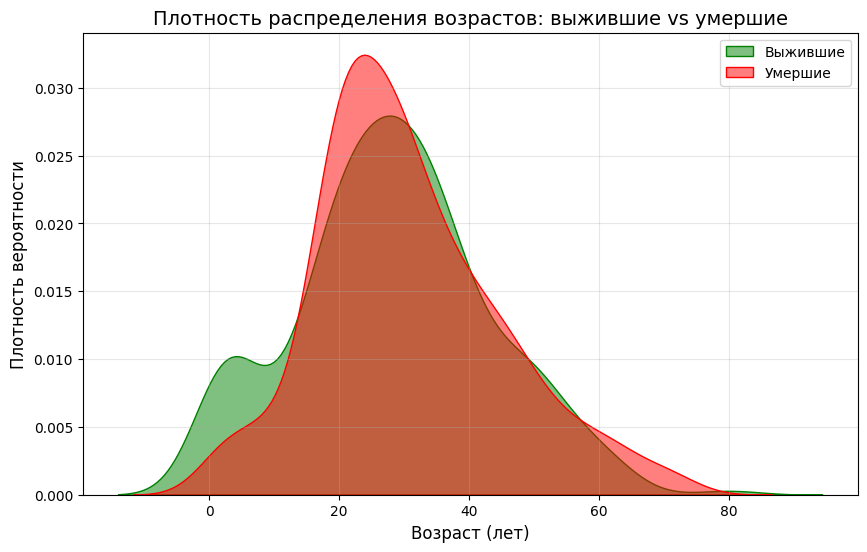

In [53]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Survived'] == 1]['Age'].dropna(), label='Выжившие', fill=True, alpha=0.5, color='green')
sns.kdeplot(data=df[df['Survived'] == 0]['Age'].dropna(), label='Умершие', fill=True, alpha=0.5, color='red')
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Плотность распределения возрастов: выжившие vs умершие', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл